In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
plt.rcParams['figure.constrained_layout.use'] = False
mpl.rcParams.update({'font.size': 9})

age = 13.800797497330507

In [77]:
path = '../../Data/ram_pressure.hdf5'
data = pd.read_hdf(path, key='h148_28')

In [78]:
data

,t,a,h1dist,Rvir,M_star,M_gas,hostRvir,vel_CGM,rho_CGM,Pram,vel_CGM_adv,rho_CGM_adv,Pram_adv,M_host_enc,m_sat_enc,r_R,Prest
0,4.750210,0.430141,652.966609,71.079248,48378395.97473597,880696867.8836668,314.463331,145.128593,122.403361,2.578097e+06,64.527415,3366275.5881659756,14016455619.402273,1024752492968.5491,6888738523.58121,94.90212038069946,0
0,5.181190,0.457383,548.481119,70.887422,50340706.259726524,902489264.221616,323.198833,155.686748,139.328681,3.377099e+06,73.497682,6066499.01805165,32770676836.862614,1112620023529.4683,6492383912.827483,99.2179082523668,0
0,5.868065,0.500057,389.891294,72.067895,53263441.7043429,1043157486.1009141,321.974092,199.351330,215.773995,8.575064e+06,131.272735,449648.14147750096,7748575540.71287,1099990958514.2979,6745405537.717264,99.21458361256958,0
0,6.474131,0.537186,247.823167,57.695632,59657176.68575494,980661375.0033737,331.108004,222.486351,450.611783,2.230536e+07,133.831596,5158873.212403908,92400041353.60861,1141297298338.2974,5989911089.246008,83.65830678669502,0
0,6.905111,0.563402,184.918850,24.170191,64864769.830537885,614077638.0719092,335.372464,250.347072,905.117743,5.672704e+07,125.388265,11630626.729914062,182859236143.46964,1042961769779.2887,2440291655.6822333,45.87706481042299,0
0,7.039793,0.571574,181.335197,20.554991,65523239.73535896,573724005.3110077,336.611961,257.755319,941.764316,6.256875e+07,130.678274,19906076.996680427,339932319921.5913,1046048421237.4684,1941488115.5771227,42.14664174425628,0
0,7.336092,0.589531,203.356568,31.872779,70361417.35754895,585823287.5369614,340.168137,247.093456,748.839767,4.572054e+07,151.649104,6194656.161166212,142461299225.48444,1124525820577.5027,3027204142.5183835,57.73455649582108,0
0,7.767072,0.615628,267.667358,63.981653,73860558.61114168,560009327.5454233,354.850273,207.452855,383.557310,1.650704e+07,190.103933,2848934.135717312,102959070151.74005,1325289240272.3174,5255868155.095895,101.85542971824187,0
0,8.198053,0.641740,328.897641,62.210943,77543632.01647481,458264276.35115826,367.540361,170.899475,267.610108,7.815990e+06,133.915684,6739592.569967665,120863878769.21947,1494309719248.9797,4736355384.37378,106.71829810249936,0
0,8.608831,0.666686,358.082266,61.015714,78319581.70883475,413273925.6328125,375.641359,141.961205,173.896096,3.504525e+06,101.864124,4389123.282058562,45542858909.38976,1581664548983.4456,4331263875.817672,109.89592821775312,0


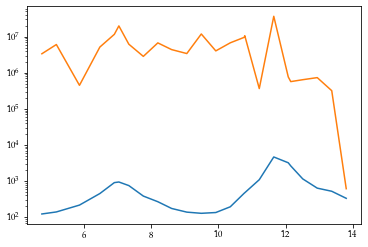

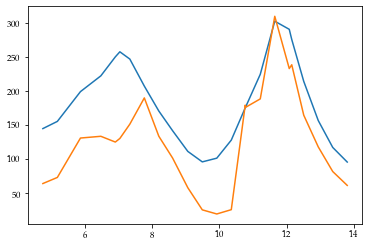

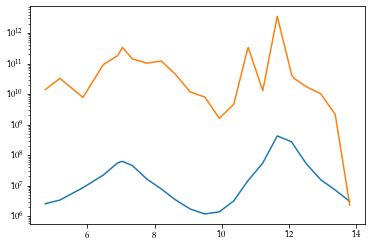

In [79]:
plt.figure()
plt.plot(data.t, data.rho_CGM)
plt.plot(data.t, data.rho_CGM_adv)
plt.semilogy()
plt.show()

plt.figure()
plt.plot(data.t, data.vel_CGM)
plt.plot(data.t, data.vel_CGM_adv)
plt.show()

plt.figure()
plt.plot(data.t, data.Pram)
plt.plot(data.t, data.Pram_adv)
plt.semilogy()
plt.show()

/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10


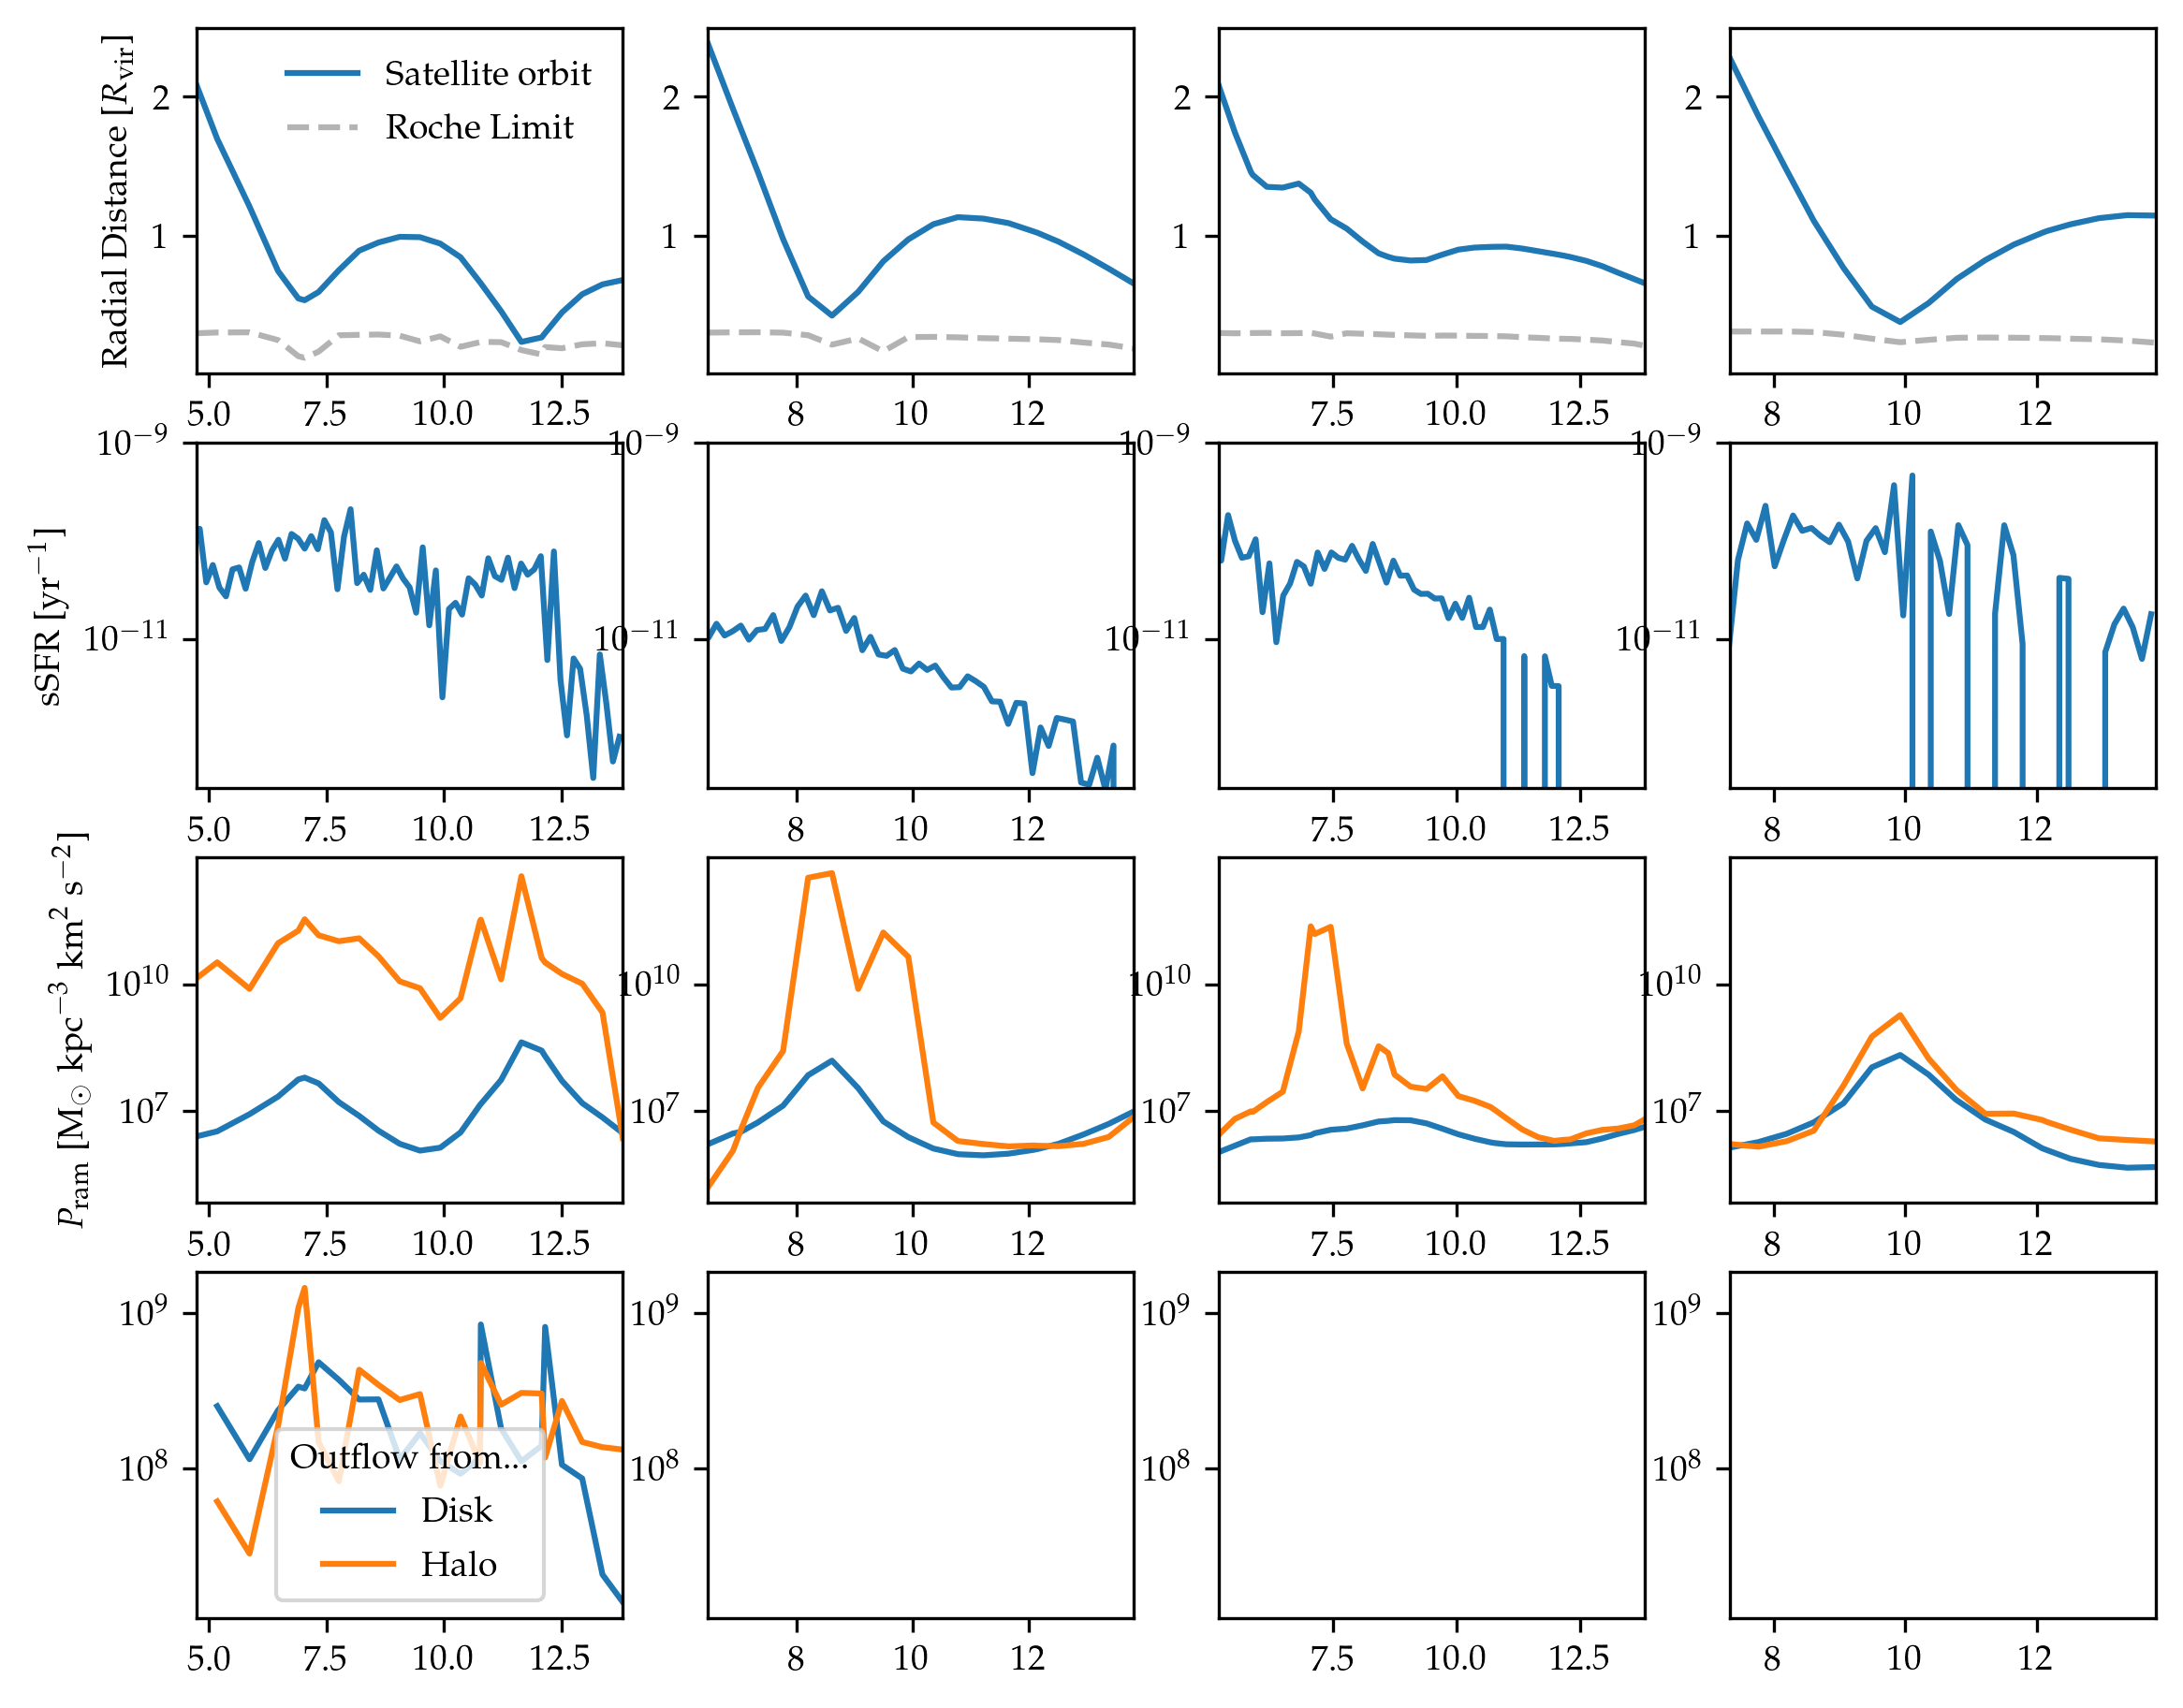

In [80]:
fig = plt.figure(dpi=300, figsize=(9,7.5))
gs = mpl.gridspec.GridSpec(4,4,figure=fig)

###############################################
key = 'h148_28'
data = pd.read_hdf(path, key=key)
ax_dist = plt.subplot(gs[0,0])
ax_sSFR = plt.subplot(gs[1,0], sharex=ax_dist)
ax_Pram = plt.subplot(gs[2,0], sharex=ax_dist)
ax_flow = plt.subplot(gs[3,0], sharex=ax_dist)

ax_dist.plot(data.t, data.h1dist/data.hostRvir, label='Satellite orbit')
ax_dist.plot(data.t, data.r_R/data.hostRvir, linestyle='--', color='0.7', label='Roche Limit')
ax_dist.set_ylabel(r'Radial Distance [$R_{\rm vir}$]')
ax_dist.legend(frameon=False)


ax_sSFR.plot(*get_sfh(key))
ax_sSFR.semilogy()
ax_sSFR.set_xlim(np.min(data.t), age)
ax_sSFR.set_ylim(3e-13,1e-9)
ax_sSFR.set_ylabel(r'sSFR [yr$^{-1}$]')


ax_Pram.plot(data.t, data.Pram, label='simple')
ax_Pram.plot(data.t, data.Pram_adv, label='adv')
ax_Pram.semilogy()
ax_Pram.set_ylabel(r'$P_{\rm ram}$ [$\mathrm{M}_\odot~\mathrm{kpc}^{-3}~\mathrm{km}^2~\mathrm{s}^{-2}$]')


transfers = pd.read_hdf('../../Data/transfers.hdf5', key=key)
rates = transfers.groupby(['t2','between'])['massrate'].sum()
rates = pd.DataFrame(rates).reset_index()
    
r1 = rates[rates.between=='satdisk_sathalo']
r2 = rates[rates.between=='sathalo_satdisk']
ax_flow.plot(r1.t2, np.array(r1.massrate), label='Disk')

r1 = rates[rates.between=='sathalo_hosthalo']
r2 = rates[rates.between=='hosthalo_sathalo']

ax_flow.plot(r1.t2, np.array(r1.massrate), label='Halo')
    
    
ax_flow.legend(title='Outflow from...')
ax_flow.set_yscale('symlog')



###############################################
key = 'h148_13'
data = pd.read_hdf(path, key=key)
ax_dist = plt.subplot(gs[0,1], sharey=ax_dist)
ax_sSFR = plt.subplot(gs[1,1], sharex=ax_dist, sharey=ax_sSFR)
ax_Pram = plt.subplot(gs[2,1], sharex=ax_dist, sharey=ax_Pram)
ax_flow = plt.subplot(gs[3,1], sharex=ax_dist, sharey=ax_flow)

ax_dist.plot(data.t, data.h1dist/data.hostRvir, label='Satellite orbit')
ax_dist.plot(data.t, data.r_R/data.hostRvir, linestyle='--', color='0.7', label='Roche Limit')


ax_sSFR.plot(*get_sfh(key))
ax_sSFR.semilogy()
ax_sSFR.set_xlim(np.min(data.t), age)
ax_sSFR.set_ylim(3e-13,1e-9)


ax_Pram.plot(data.t, data.Pram, label='simple')
ax_Pram.plot(data.t, data.Pram_adv, label='adv')
ax_Pram.semilogy()





###############################################
key = 'h242_24'
data = pd.read_hdf(path, key=key)
ax_dist = plt.subplot(gs[0,2], sharey=ax_dist)
ax_sSFR = plt.subplot(gs[1,2], sharex=ax_dist, sharey=ax_sSFR)
ax_Pram = plt.subplot(gs[2,2], sharex=ax_dist, sharey=ax_Pram)
ax_flow = plt.subplot(gs[3,2], sharex=ax_dist, sharey=ax_flow)


ax_dist.plot(data.t, data.h1dist/data.hostRvir, label='Satellite orbit')
ax_dist.plot(data.t, data.r_R/data.hostRvir, linestyle='--', color='0.7', label='Roche Limit')


ax_sSFR.plot(*get_sfh(key))
ax_sSFR.semilogy()
ax_sSFR.set_xlim(np.min(data.t), age)
ax_sSFR.set_ylim(3e-13,1e-9)


ax_Pram.plot(data.t, data.Pram, label='simple')
ax_Pram.plot(data.t, data.Pram_adv, label='adv')
ax_Pram.semilogy()





###############################################
key = 'h148_37'
data = pd.read_hdf(path, key=key)
ax_dist = plt.subplot(gs[0,3], sharey=ax_dist)
ax_sSFR = plt.subplot(gs[1,3], sharex=ax_dist, sharey=ax_sSFR)
ax_Pram = plt.subplot(gs[2,3], sharex=ax_dist, sharey=ax_Pram)
ax_flow = plt.subplot(gs[3,3], sharex=ax_dist, sharey=ax_flow)


ax_dist.plot(data.t, data.h1dist/data.hostRvir, label='Satellite orbit')
ax_dist.plot(data.t, data.r_R/data.hostRvir, linestyle='--', color='0.7', label='Roche Limit')


ax_sSFR.plot(*get_sfh(key))
ax_sSFR.semilogy()
ax_sSFR.set_xlim(np.min(data.t), age)
ax_sSFR.set_ylim(3e-13,1e-9)


ax_Pram.plot(data.t, data.Pram, label='simple')
ax_Pram.plot(data.t, data.Pram_adv, label='adv')
ax_Pram.semilogy()



plt.show()

In [ ]:
def read_timesteps(simname):
    '''Function to read in the timestep bulk-processing datafile (from /home/akinhol/Data/Timescales/DataFiles/{name}.data)'''
    data = []
    with open(f'../../Data/timesteps_data/{simname}.data','rb') as f:
        while True:
            try: 
                data.append(pickle.load(f))
            except EOFError:
                break
    
    data = pd.DataFrame(data)
    return data

def get_sfh(key):
    # need to write a script to write lists of formation times and formation masses calculated using fsps probably
    data = pd.read_hdf('../../Data/sfhs.hdf5',key=key)
    tform = np.array(data.tform)
    massform = np.array(data.massform) # not actually massform
    
    bins = np.linspace(0, age, 100)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    
    trange = [tform.min(), tform.max()]
    binnorm = 1e-9 * len(bins) / (trange[1] - trange[0])
    weights = massform*binnorm

    sfr, bins = np.histogram(tform, weights=weights, bins=bins)

    # get timestep data to spline fit mstar
    sim = str(key[:4])
    haloid = int(key[5:])
    timesteps = read_timesteps(sim)
    timesteps = timesteps[timesteps.z0haloid==haloid]
    time = np.flip(np.array(timesteps.time,dtype=float))
    mstar = np.flip(np.log10(np.array(timesteps.mstar,dtype=float)))
    
    from scipy.interpolate import UnivariateSpline
    w = np.isnan(mstar) | np.isinf(mstar)
    mstar[w] = 0.
    spl = UnivariateSpline(time,mstar, w = ~w)
    mstar_int = spl(bincenters)

    # get sSFR
    sSFR = sfr/np.power(10,mstar_int)
    
    return bincenters, sSFR

In [ ]:
def write_transfers(key):
    import tqdm
    path = '../../Data/tracked_particles.hdf5'
    data = pd.read_hdf(path, key=key)

    # temporary
    data = data.rename(columns={'sat_disk': 'sat_disk_wrong', 'host_disk': 'host_disk_wrong',
                                'sat_halo': 'sat_halo_wrong', 'host_halo': 'host_halo_wrong'})

    data['sat_disk'] = (data.rho >= 0.1) & (data.temp <= 1.2e4) & (data.r <= 3)
    data['sat_halo'] = (data.r_per_Rvir < 1) & ~data.sat_disk
    data['host_disk'] = (data.rho >= 0.1) & (data.temp <= 1.2e4) & (data.r_per_Rvir > 1) & (data.h1dist < 0.1)
    data['host_halo'] = (data.r_per_Rvir > 1) & (data.h1dist < 1) & ~data.host_disk
    
    pids = np.unique(data.pid)
    
    transfers = pd.DataFrame(columns = ['t1','t2','between','mass'])
    
    # loop through every particle
    for pid in tqdm.tqdm(pids):
        dat = data[data.pid==pid]
        times = np.array(dat.time)
        mass = np.array(dat.mass)
        coolontime = np.array(dat.coolontime)

        sat_disk = np.array(dat.sat_disk)
        sat_halo = np.array(dat.sat_halo)
        host_disk = np.array(dat.host_disk)
        host_halo = np.array(dat.host_halo)
        IGM = np.array(dat.IGM)

        for i,t2 in enumerate(times[1:]):
            i += 1
            t1 = times[i-1]
            if sat_disk[i-1] and sat_halo[i]:
                between = 'satdisk_sathalo'
            elif sat_halo[i-1] and sat_disk[i]:
                between = 'sathalo_satdisk'
            elif sat_halo[i-1] and host_halo[i]:
                between = 'sathalo_hosthalo'
            elif host_halo[i-1] and sat_halo[i]:
                between = 'hosthalo_sathalo'
            elif host_halo[i-1] and host_disk[i]:
                betewen = 'hosthalo_hostdisk'
            elif host_halo[i-1] and IGM[i]:
                between = 'hosthalo_IGM'
            elif host_disk[i-1] and host_halo[i]:
                between = 'hostdisk_hosthalo'
            elif IGM[i-1] and host_halo[i]:
                between = 'IGM_hosthalo'
            else: # a transfer we aren't interested in 
                continue

            outdict = {'t1':[t1], 't2':[t2], 'between':[between], 'mass':[mass[i]], 'coolontime':[coolontime[i]]}
            transfers = pd.concat([transfers, pd.DataFrame(outdict)])

    transfers['delta_t'] = transfers.t2 - transfers.t1
    transfers['massrate'] = transfers.mass/transfers.delta_t
    transfers['SNe_aff'] = transfers.coolontime > transfers.t1 # use t1 to determine if it was expelled but cooled quickly
    
    transfers.to_hdf('../../Data/transfers.hdf5',key=key)
    

In [ ]:
write_transfers('h148_28')